**Failed fine tuning experiment with edited loss function (distance weight = 5)**

Setup environment

In [ ]:
import os
!pip install nuscenes-devkit tensorboardX timm efficientnet_pytorch lyft-dataset-sdk
!rm -rf /data/sets/nuscenes/mini/*
!mkdir -p /data/sets/nuscenes/mini

%cd /data/sets/nuscenes/mini
!wget -O v1.0-mini.tgz https://www.nuscenes.org/data/v1.0-mini.tgz

!tar -xf v1.0-mini.tgz

import os
if os.path.exists("/data/sets/nuscenes/mini/maps"):
    print("SUCCESS")
else:
    print("ERROR")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 7.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.0/316.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━

/data/sets/nuscenes/mini
--2025-12-16 16:49:40--  https://www.nuscenes.org/data/v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 13.32.205.98, 13.32.205.38, 13.32.205.100, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|13.32.205.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167696325 (3.9G) [application/x-tar]
Saving to: ‘v1.0-mini.tgz’

v1.0-mini.tgz       100%[===================>]   3.88G   223MB/s    in 17s     

2025-12-16 16:49:57 (232 MB/s) - ‘v1.0-mini.tgz’ saved [4167696325/4167696325]

SUCCESS


In [ ]:
%cd /content

!git clone https://github.com/aharley/simple_bev.git

%cd simple_bev

!sh get_rgb_model.sh
!sh get_rad_model.sh

!ls checkpoints/

/content
Cloning into 'simple_bev'...
remote: Enumerating objects: 375, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 375 (delta 42), reused 45 (delta 41), pack-reused 326 (from 1)
Receiving objects: 100% (375/375), 144.00 KiB | 2.36 MiB/s, done.
Resolving deltas: 100% (224/224), done.
/content/simple_bev
downloading rgb model from dropbox...
--2025-12-16 16:50:42--  https://www.dropbox.com/s/n93ryvrqyiram56/rgb_checkpoint.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/k4pk5szq7i0gul2aqylb1/rgb_checkpoint.tar.gz?rlkey=6fmruxvsvh6nij3lfuyjn51ub [following]
--2025-12-16 16:50:43--  https://www.dropbox.com/scl/fi/k4pk5szq7i0gul2aqylb1/rgb_checkpoint.tar.gz?rlkey=6fmruxvsvh6nij3lfuyjn51ub
Reusing existing con

In [ ]:
import os
import gdown
import shutil

maps_dir = "/data/sets/nuscenes/mini/maps"
expansion_dir = os.path.join(maps_dir, "expansion")
os.makedirs(maps_dir, exist_ok=True)

file_id = '1DRbeJ1OboL37W7Dl4eBbCTzvC-Uk1oLf'
url = f'https://drive.google.com/uc?id={file_id}'
output_zip = os.path.join(maps_dir, "nuScenes-map-expansion-v1.3.zip")

gdown.download(url, output_zip, quiet=False)

if os.path.exists(output_zip):
    !unzip -o "$output_zip" -d "$maps_dir"

    os.makedirs(expansion_dir, exist_ok=True)

    required_maps = [
        "singapore-onenorth.json",
        "boston-seaport.json",
        "singapore-hollandvillage.json",
        "singapore-queenstown.json"
    ]

    moved_count = 0
    for map_name in required_maps:
        src = os.path.join(maps_dir, map_name)
        dst = os.path.join(expansion_dir, map_name)

        if os.path.exists(src):
            shutil.move(src, dst)
            moved_count += 1
        elif os.path.exists(dst):
            moved_count += 1

    print(f"\nMaps downloaded! .")
    !ls -lh "$expansion_dir"
else:
    print("Error: map downloading failed")

Downloading...
From (original): https://drive.google.com/uc?id=1DRbeJ1OboL37W7Dl4eBbCTzvC-Uk1oLf
From (redirected): https://drive.google.com/uc?id=1DRbeJ1OboL37W7Dl4eBbCTzvC-Uk1oLf&confirm=t&uuid=6784a8fd-a591-457d-b692-a626ca76fafa
To: /data/sets/nuscenes/mini/maps/nuScenes-map-expansion-v1.3.zip
100%|██████████| 399M/399M [00:03<00:00, 104MB/s]


Archive:  /data/sets/nuscenes/mini/maps/nuScenes-map-expansion-v1.3.zip
   creating: /data/sets/nuscenes/mini/maps/basemap/
  inflating: /data/sets/nuscenes/mini/maps/basemap/boston-seaport.png  
  inflating: /data/sets/nuscenes/mini/maps/basemap/singapore-hollandvillage.png  
  inflating: /data/sets/nuscenes/mini/maps/basemap/singapore-queenstown.png  
  inflating: /data/sets/nuscenes/mini/maps/basemap/singapore-onenorth.png  
   creating: /data/sets/nuscenes/mini/maps/expansion/
  inflating: /data/sets/nuscenes/mini/maps/expansion/boston-seaport.json  
  inflating: /data/sets/nuscenes/mini/maps/expansion/singapore-onenorth.json  
  inflating: /data/sets/nuscenes/mini/maps/expansion/singapore-queenstown.json  
  inflating: /data/sets/nuscenes/mini/maps/expansion/singapore-hollandvillage.json  
   creating: /data/sets/nuscenes/mini/maps/prediction/
  inflating: /data/sets/nuscenes/mini/maps/prediction/prediction_scenes.json  
  inflating: /data/sets/nuscenes/mini/maps/LICENSE  

Maps d

Let's first run cell below to create training function train_weighted.py

In [ ]:
%cd /content/simple_bev

code_long_range = """
import os
import time
import argparse
import numpy as np
import saverloader
from fire import Fire
from nets.segnet import Segnet
import utils.misc
import utils.improc
import utils.vox
import random
import nuscenesdataset
import torch
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Asetukset
scene_centroid = torch.tensor([0.0, 1.0, 0.0]).reshape([1, 3]).float()
bounds = (-50, 50, -5, 5, -50, 50)
Z, Y, X = 200, 8, 200

# Loss-funktio
class DistanceWeightedLoss(nn.Module):
    def __init__(self, pos_weight, H=200, W=200, max_weight=5.0):
        super(DistanceWeightedLoss, self).__init__()
        self.pos_weight = torch.Tensor([pos_weight])
        self.max_weight = max_weight

        # Luodaan etäisyyskartta
        xs = torch.linspace(-50, 50, W)
        zs = torch.linspace(-50, 50, H)
        X_grid, Z_grid = torch.meshgrid(xs, zs, indexing='xy')
        dist = torch.sqrt(X_grid**2 + Z_grid**2)
        max_dist = 50.0
        norm_dist = torch.clamp(dist / max_dist, 0, 1)

        # TÄMÄ ON SE TAICA: Etäisyyspainotus
        self.weight_map = 1.0 + (self.max_weight - 1.0) * norm_dist
        self.weight_map = self.weight_map.unsqueeze(0).unsqueeze(0)

    def forward(self, ypred, ytgt, valid):
        if self.weight_map.device != ypred.device:
            self.weight_map = self.weight_map.to(ypred.device)
            self.pos_weight = self.pos_weight.to(ypred.device)

        loss_fn = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight, reduction='none')
        pixel_loss = loss_fn(ypred, ytgt)

        # Kerrotaan loss etäisyyskartalla (nyt jopa 20x)
        weighted_loss = pixel_loss * self.weight_map
        loss = utils.basic.reduce_masked_mean(weighted_loss, valid)
        return loss

def train(
    exp_name='rgb_long_range_focus',
    max_iters=800, # Annetaan aikaa (pieni LR vaatii enemmän steppejä)
    dset='mini',
    data_dir='/data/sets/nuscenes',
    init_dir='',
    res_scale=2,
    batch_size=4,
    lr=1e-5, # <--- TÄRKEÄ: Pieni LR pitää homman vakaana
    weight_strength=5.0, # <--- TÄRKEÄ: Etäisyyspaino tappiin (oli 5.0)
    pos_weight=4.0, # <--- TÄRKEÄ: Maltillinen nosto autoille (oli 2.13)
    device_ids=[0]
):
    device = 'cuda:%d' % device_ids[0]

    final_dim = (int(224 * res_scale), int(400 * res_scale))
    data_aug_conf = {
        'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': final_dim,
        'H': 900, 'W': 1600,
        'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'],
        'ncams': 6,
    }

    # Train set lataus
    dataloader, _ = nuscenesdataset.compile_data(
        dset, data_dir, data_aug_conf=data_aug_conf,
        centroid=scene_centroid.numpy(), bounds=bounds, res_3d=(Z,Y,X),
        bsz=batch_size, nworkers=2, shuffle=True, seqlen=1, nsweeps=5,
        get_tids=True
    )
    dataloader.dataset.data_root = os.path.join(data_dir, dset)
    iterloader = iter(dataloader)

    model = Segnet(Z, Y, X, use_radar=False, encoder_type='res101')
    model = model.to(device)
    model = torch.nn.DataParallel(model, device_ids=device_ids)

    if init_dir:
        print(f"Loading pretrained weights from {init_dir}")
        saverloader.load(init_dir, model.module)

    # --- UNFROZEN ENCODER ---
    # Tarvitsemme koko verkon kapasiteetin nähdäksemme kauas
    print("Encoder is FULLY UNFROZEN.")

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    print(f"Using DistanceWeightedLoss with max_weight={weight_strength}, pos_weight={pos_weight}")
    loss_fn = DistanceWeightedLoss(pos_weight=pos_weight, max_weight=weight_strength).to(device)

    model.train()
    global_step = 0
    print("Starting Long-Range Focused Training...")

    while global_step < max_iters:
        global_step += 1
        try:
            batch = next(iterloader)
        except StopIteration:
            iterloader = iter(dataloader)
            batch = next(iterloader)

        imgs, rots, trans, intrins, pts0, extra0, pts, extra, lrtlist_velo, vislist, tidlist, scorelist, seg_bev_g, valid_bev_g, center_bev_g, offset_bev_g, radar_data, egopose = batch

        imgs = imgs[:,0].float().to(device) - 0.5
        seg_bev_g = seg_bev_g[:,0].to(device)
        valid_bev_g = valid_bev_g[:,0].to(device)

        B = imgs.shape[0]
        rots = rots[:,0]
        trans = trans[:,0]
        intrins = intrins[:,0]

        __p = lambda x: utils.basic.pack_seqdim(x, B)
        __u = lambda x: utils.basic.unpack_seqdim(x, B)
        intrins_ = __p(intrins)
        pix_T_cams_ = utils.geom.merge_intrinsics(*utils.geom.split_intrinsics(intrins_)).to(device)
        pix_T_cams = __u(pix_T_cams_)
        velo_T_cams = utils.geom.merge_rtlist(rots, trans).to(device)
        cam0_T_camXs = utils.geom.get_camM_T_camXs(velo_T_cams, ind=0)

        vox_util = utils.vox.Vox_util(Z, Y, X, scene_centroid=scene_centroid.to(device), bounds=bounds, assert_cube=False)

        _, _, seg_bev_e, _, _ = model(
                rgb_camXs=imgs,
                pix_T_cams=pix_T_cams,
                cam0_T_camXs=cam0_T_camXs,
                vox_util=vox_util,
                rad_occ_mem0=None)

        loss = loss_fn(seg_bev_e, seg_bev_g, valid_bev_g)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if global_step % 10 == 0:
            print(f"Step {global_step}/{max_iters}, Loss: {loss.item():.4f}")

    save_path = os.path.join('checkpoints', exp_name)
    os.makedirs(save_path, exist_ok=True)
    torch.save(model.module.state_dict(), os.path.join(save_path, 'model-000000800.pth'))
    print(f"Training finished. Model saved to {save_path}")

if __name__ == '__main__':
    Fire(train)
"""

with open("train_weighted.py", "w") as f:
    f.write(code_long_range)

/content/simple_bev


Run fine tune (train_weighted.py) on baseline cam only model by running cell below

In [ ]:
# Aja treeni
CHECKPOINT_RGB = 'checkpoints/8x5_5e-4_rgb12_22:43:46'

!python train_weighted.py \
    --exp_name='rgb_long_range_focus' \
    --max_iters=800 \
    --init_dir="$CHECKPOINT_RGB" \
    --batch_size=4

loading nuscenes...
making parser...
indices (323, 1)
NuscData: 323 samples. Split: train.
                   Augmentation Conf: {'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
indices (81, 1)
NuscData: 81 samples. Split: val.
                   Augmentation Conf: {'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
data ready
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` 

Create evaluation code to compare fine tuned model with baseline model

In [ ]:
%cd /content/simple_bev

code_eval_robust = """
import os
import time
import argparse
import numpy as np
import saverloader
from fire import Fire
from nets.segnet import Segnet
import utils.misc
import utils.improc
import utils.vox
import random
import nuscenesdataset
import torch
torch.multiprocessing.set_sharing_strategy('file_system')
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tensorboardX import SummaryWriter
import torch.nn.functional as F

random.seed(125)
np.random.seed(125)

scene_centroid = torch.tensor([0.0, 1.0, 0.0]).reshape([1, 3]).float()
bounds = (-50, 50, -5, 5, -50, 50)
Z, Y, X = 200, 8, 200

max_dist = 71
num_bins = 10
bin_size = max_dist/num_bins

class SimpleLoss(torch.nn.Module):
    def __init__(self, pos_weight):
        super(SimpleLoss, self).__init__()
        self.loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=torch.Tensor([pos_weight]), reduction='none')

    def forward(self, ypred, ytgt, valid):
        loss = self.loss_fn(ypred, ytgt)
        loss = utils.basic.reduce_masked_mean(loss, valid)
        return loss

def run_model(model, loss_fn, d, device='cuda:0'):
    metrics = {}

    imgs, rots, trans, intrins, pts0, extra0, pts, extra, lrtlist_velo, vislist, tidlist, scorelist, seg_bev_g, valid_bev_g, center_bev_g, offset_bev_g, radar_data, egopose = d

    imgs = imgs[:,0].float().to(device) - 0.5
    seg_bev_g = seg_bev_g[:,0].to(device)
    valid_bev_g = valid_bev_g[:,0].to(device)

    B = imgs.shape[0]

    rots, trans, intrins = rots[:,0], trans[:,0], intrins[:,0]
    __p = lambda x: utils.basic.pack_seqdim(x, B)
    __u = lambda x: utils.basic.unpack_seqdim(x, B)
    intrins_ = __p(intrins)
    pix_T_cams_ = utils.geom.merge_intrinsics(*utils.geom.split_intrinsics(intrins_)).to(device)
    pix_T_cams = __u(pix_T_cams_)
    velo_T_cams = utils.geom.merge_rtlist(rots, trans).to(device)
    cam0_T_camXs = utils.geom.get_camM_T_camXs(velo_T_cams, ind=0)

    vox_util = utils.vox.Vox_util(Z, Y, X, scene_centroid=scene_centroid.to(device), bounds=bounds, assert_cube=False)

    rad_occ_mem0 = None
    if model.module.use_radar:
        radar_data = radar_data[:,0]
        rad_data = radar_data.to(device).permute(0, 2, 1)
        xyz_rad = rad_data[:,:,:3]
        meta_rad = rad_data[:,:,3:]
        cams_T_velo = __u(utils.geom.safe_inverse(__p(velo_T_cams)))
        rad_xyz_cam0 = utils.geom.apply_4x4(cams_T_velo[:,0], xyz_rad)
        rad_occ_mem0 = vox_util.voxelize_xyz_and_feats(rad_xyz_cam0, meta_rad, Z, Y, X, assert_cube=False)

    _, _, seg_bev_e, _, _ = model(
            rgb_camXs=imgs,
            pix_T_cams=pix_T_cams,
            cam0_T_camXs=cam0_T_camXs,
            vox_util=vox_util,
            rad_occ_mem0=rad_occ_mem0)

    # Calculate Metrics
    seg_bev_e_round = torch.sigmoid(seg_bev_e).round()

    inter_map = seg_bev_e_round * seg_bev_g * valid_bev_g
    union_map = ((seg_bev_e_round + seg_bev_g) * valid_bev_g).clamp(0,1)

    coords_mem = utils.basic.gridcloud3d(B,Z,1,X)
    coords_cam = vox_util.Mem2Ref(coords_mem, Z, Y, X)
    dists_cam = torch.norm(coords_cam, dim=2)
    dist_map = dists_cam.reshape(1, 1, Z, X).to(device)

    inter_map_ = inter_map.reshape(-1)
    union_map_ = union_map.reshape(-1)
    dist_map_ = dist_map.reshape(-1)

    inters_ = torch.zeros(num_bins, dtype=torch.float32, device=device)
    unions_ = torch.zeros(num_bins, dtype=torch.float32, device=device)

    for bi in range(num_bins):
        bin_min = bin_size*bi
        bin_max = bin_size*(bi+1)
        inds = (dist_map_ > bin_min) & (dist_map_ < bin_max)
        inters_[bi] = inter_map_[inds].sum()
        unions_[bi] = union_map_[inds].sum()

    metrics['inters_'] = inters_.cpu().numpy()
    metrics['unions_'] = unions_.cpu().numpy()

    return metrics

def main(
        exp_name='eval',
        dset='mini',
        data_dir='../nuscenes/',
        init_dir='',
        use_radar=False,
        batch_size=1,
        device_ids=[0],
        save_name='results.npy'
):
    device = 'cuda:%d' % device_ids[0]

    final_dim = (int(224 * 2), int(400 * 2))
    data_aug_conf = {
        'final_dim': final_dim,
        'H': 900, 'W': 1600,
        'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'],
        'ncams': 6,
    }
    _, val_dataloader = nuscenesdataset.compile_data(
        dset, data_dir, data_aug_conf=data_aug_conf,
        centroid=scene_centroid.numpy(), bounds=bounds, res_3d=(Z,Y,X),
        bsz=batch_size, nworkers=2, shuffle=False, seqlen=1, nsweeps=5, get_tids=True
    )
    val_iterloader = iter(val_dataloader)

    model = Segnet(Z, Y, X, use_radar=use_radar, use_lidar=False, use_metaradar=use_radar, encoder_type='res101')
    model = model.to(device)
    model = torch.nn.DataParallel(model, device_ids=device_ids)

    # --- KORJATTU LATAUSLOGIIKKA ---
    if init_dir:
        ckpt_path = None
        if os.path.isdir(init_dir):
            # Etsitään tiedosto kansiosta
            files = [f for f in os.listdir(init_dir) if f.endswith('.pth')]
            if len(files) > 0:
                # Järjestetään, jotta otetaan uusin (jos numerointi toimii)
                files.sort()
                ckpt_path = os.path.join(init_dir, files[-1])
        elif os.path.isfile(init_dir):
            ckpt_path = init_dir

        if ckpt_path:
            print(f"Ladataan checkpoint: {ckpt_path}")
            checkpoint = torch.load(ckpt_path, map_location=device)

            # TARKISTUS: Onko 'model_state_dict' vai suorat painot?
            if 'model_state_dict' in checkpoint:
                print("Ladataan 'model_state_dict' avaimesta.")
                model.module.load_state_dict(checkpoint['model_state_dict'], strict=False)
            else:
                print("Ladataan suoraan state_dictistä.")
                model.module.load_state_dict(checkpoint, strict=False)
        else:
            print(f"VAROITUS: Checkpointia {init_dir} ei löytynyt!")
    # -------------------------------

    model.eval()

    inters_over_distance = np.zeros(num_bins)
    unions_over_distance = np.zeros(num_bins)

    max_iters = len(val_dataloader)
    print(f"Evaluating {init_dir}...")

    for _ in range(max_iters):
        try:
            sample = next(val_iterloader)
        except StopIteration:
            break

        with torch.no_grad():
            metrics = run_model(model, None, sample, device)

        inters_over_distance += metrics['inters_']
        unions_over_distance += metrics['unions_']

    ious = inters_over_distance / np.maximum(unions_over_distance, 1.0) * 100
    print('ious_over_distance', ious)
    print('mean iou', np.mean(ious))

    np.save(save_name, ious)
    print(f"Tulokset tallennettu: {save_name}")

if __name__ == '__main__':
    Fire(main)
"""

with open("eval_over_distance.py", "w") as f:
    f.write(code_eval_robust)

/content/simple_bev


Run evaluation on both models

In [ ]:

CKPT_BASELINE_CAM = '/content/simple_bev/checkpoints/8x5_5e-4_rgb12_22:43:46'
CKPT_OPTIMIZED = '/content/simple_bev/checkpoints/rgb_long_range_focus' #

# Baseline Camera
print("--- 1. Evaluating Baseline Camera only---")
!python eval_over_distance.py \
    --init_dir="$CKPT_BASELINE_CAM" \
    --use_radar=False \
    --dset='mini' \
    --data_dir='/data/sets/nuscenes' \
    --batch_size=1 \
    --save_name='res_cam_orig.npy'

#Optimized Camera
print("\nEvaluating fine-tuend Camera only ---")
!python eval_over_distance.py \
    --init_dir="$CKPT_OPTIMIZED" \
    --use_radar=False \
    --dset='mini' \
    --data_dir='/data/sets/nuscenes' \
    --batch_size=1 \
    --save_name='res_cam_imp.npy'

--- 1. Evaluating Baseline Camera only---
loading nuscenes...
making parser...
indices (323, 1)
NuscData: 323 samples. Split: train.
                   Augmentation Conf: {'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
indices (81, 1)
NuscData: 81 samples. Split: val.
                   Augmentation Conf: {'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
data ready
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and ma

Visualization

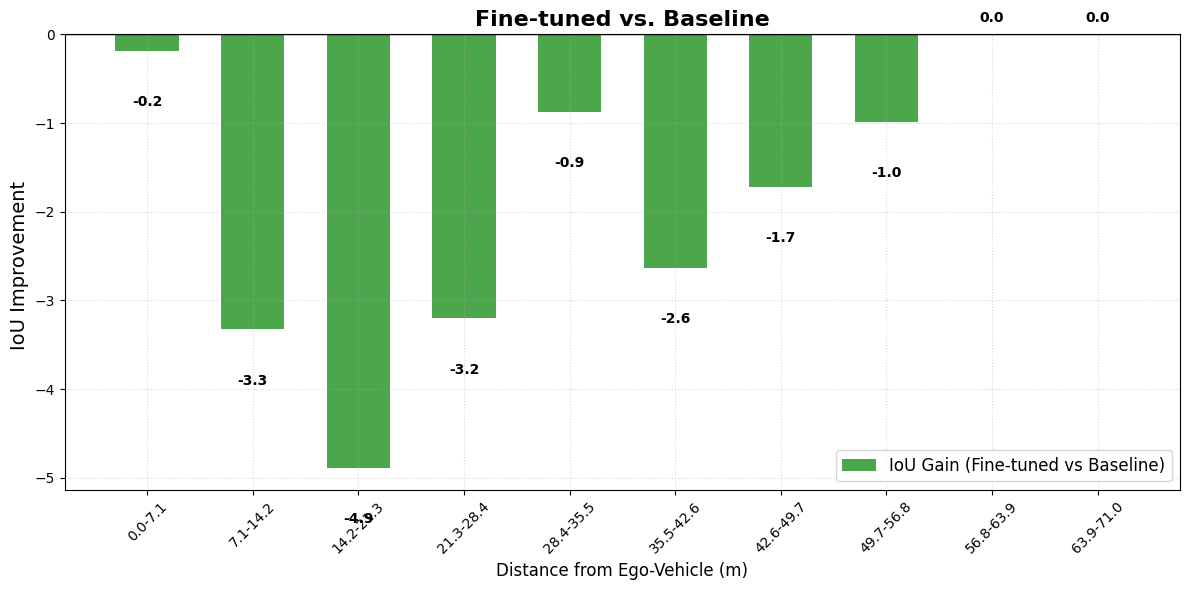

------------------------------
Mean IoU (Cam Baseline):  38.30
Mean IoU (Cam Optimized): 36.52


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_cam_orig = np.load('res_cam_orig.npy')
y_cam_imp = np.load('res_cam_imp.npy')

#(Optimized - Baseline)
delta_imp = y_cam_imp - y_cam_orig

max_dist = 71.0
num_bins = 10
bin_size = max_dist / num_bins
distances = [f"{i*bin_size:.1f}-{(i+1)*bin_size:.1f}" for i in range(num_bins)]
x = np.arange(len(distances))

plt.figure(figsize=(12, 6))

bars = plt.bar(x, delta_imp, color='green', alpha=0.7, label='IoU Gain (Fine-tuned vs Baseline)', width=0.6)

plt.axhline(0, color='black', linewidth=1)

plt.title('Fine-tuned vs. Baseline', fontsize=16, fontweight='bold')
plt.ylabel('IoU Improvement ', fontsize=14)
plt.xlabel('Distance from Ego-Vehicle (m)', fontsize=12)
plt.xticks(x, distances, rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.5)

for bar in bars:
    yval = bar.get_height()
    offset = 0.1 if yval >= 0 else -0.5
    va = 'bottom' if yval >= 0 else 'top'

    plt.text(bar.get_x() + bar.get_width()/2, yval + offset,
             f"{yval:.1f}", ha='center', va=va, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('final_gain_chart_cam_only.png', dpi=300)
plt.show()

print("-" * 30)
print(f"Mean IoU (Cam Baseline):  {np.mean(y_cam_orig):.2f}")
print(f"Mean IoU (Cam Optimized): {np.mean(y_cam_imp):.2f}")